In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import catboost as cb
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv("hybrid_data_1.csv")

In [4]:
df.head()

,material type,SA,TPV,C,H,N,O,T,P,CO2
0,Microporous,976.0,1.07,40.18,4.46,42.16,5.25,0,1.0,4.295
1,Microporous,976.0,1.07,40.18,4.46,42.16,5.25,25,1.0,2.795
2,Microporous,807.0,NaN,NaN,NaN,NaN,NaN,0,1.0,3.000
3,Microporous,513.0,NaN,NaN,NaN,NaN,NaN,0,1.0,2.159
4,Hierarchical,870.0,0.83,64.38,4.17,9.79,NaN,0,1.0,3.363


In [5]:
dummies = pd.get_dummies(df['material type'],prefix='type')
df[list(dummies.columns)] = dummies

l = [
 'type_Hierarchical',
 'type_Macroporous',
 'type_Mesoporous',
 'type_Microporous',
 'SA',
 'TPV',
 'C',
 'H',
 'N',
 'O',
 'T',
 'P',
 'CO2']

df = df[l]

df.head()

,type_Hierarchical,type_Macroporous,type_Mesoporous,type_Microporous,SA,TPV,C,H,N,O,T,P,CO2
0,0,0,0,1,976.0,1.07,40.18,4.46,42.16,5.25,0,1.0,4.295
1,0,0,0,1,976.0,1.07,40.18,4.46,42.16,5.25,25,1.0,2.795
2,0,0,0,1,807.0,NaN,NaN,NaN,NaN,NaN,0,1.0,3.000
3,0,0,0,1,513.0,NaN,NaN,NaN,NaN,NaN,0,1.0,2.159
4,1,0,0,0,870.0,0.83,64.38,4.17,9.79,NaN,0,1.0,3.363


In [6]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.CO2, test_size = 0.2,random_state=0)

In [7]:
numeric_features = ['SA', 'TPV', 'C', 'H', 'N', 'O', 'T', 'P']
categorical_features = ['type_Hierarchical', 'type_Macroporous', 'type_Mesoporous', 'type_Microporous']

numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_KNN", KNNImputer(n_neighbors=10)),
        ("standard_scaler", StandardScaler()),
    ]
)

# ColumnTransformer for preprocessing
preprocessing = ColumnTransformer(transformers=[
    ('numeric', numeric_preprocessor, numeric_features),
    ('categorical', 'passthrough', categorical_features),
])

In [8]:
pipe = Pipeline(
steps=[
    ("preprocessor",preprocessing),
    ("regressor",cb.CatBoostRegressor(loss_function='RMSE',l2_leaf_reg=1,learning_rate=0.1,n_estimators=300))
])

In [9]:
pipe.fit(X_train,y_train)

0:	learn: 1.5843472	total: 165ms	remaining: 49.4s
1:	learn: 1.4992083	total: 169ms	remaining: 25.2s
2:	learn: 1.4442797	total: 173ms	remaining: 17.1s
3:	learn: 1.3758886	total: 175ms	remaining: 13s
4:	learn: 1.3120650	total: 177ms	remaining: 10.5s
5:	learn: 1.2578939	total: 179ms	remaining: 8.77s
6:	learn: 1.2039211	total: 181ms	remaining: 7.56s
7:	learn: 1.1630867	total: 182ms	remaining: 6.65s
8:	learn: 1.1232330	total: 184ms	remaining: 5.94s
9:	learn: 1.0797286	total: 185ms	remaining: 5.37s
10:	learn: 1.0389296	total: 187ms	remaining: 4.9s
11:	learn: 1.0055992	total: 188ms	remaining: 4.5s
12:	learn: 0.9745432	total: 189ms	remaining: 4.17s
13:	learn: 0.9486126	total: 190ms	remaining: 3.88s
14:	learn: 0.9275059	total: 191ms	remaining: 3.63s
15:	learn: 0.9042858	total: 192ms	remaining: 3.4s
16:	learn: 0.8798211	total: 193ms	remaining: 3.21s
17:	learn: 0.8614192	total: 194ms	remaining: 3.03s
18:	learn: 0.8423973	total: 195ms	remaining: 2.88s
19:	learn: 0.8261720	total: 195ms	remaining: 2

221:	learn: 0.0918619	total: 336ms	remaining: 118ms
222:	learn: 0.0916554	total: 337ms	remaining: 116ms
223:	learn: 0.0913867	total: 338ms	remaining: 115ms
224:	learn: 0.0911980	total: 338ms	remaining: 113ms
225:	learn: 0.0908826	total: 339ms	remaining: 111ms
226:	learn: 0.0900640	total: 340ms	remaining: 109ms
227:	learn: 0.0897835	total: 341ms	remaining: 108ms
228:	learn: 0.0889477	total: 341ms	remaining: 106ms
229:	learn: 0.0880021	total: 342ms	remaining: 104ms
230:	learn: 0.0871730	total: 343ms	remaining: 102ms
231:	learn: 0.0863791	total: 343ms	remaining: 101ms
232:	learn: 0.0852495	total: 344ms	remaining: 99ms
233:	learn: 0.0843735	total: 345ms	remaining: 97.3ms
234:	learn: 0.0834805	total: 346ms	remaining: 95.6ms
235:	learn: 0.0824184	total: 346ms	remaining: 93.9ms
236:	learn: 0.0822249	total: 347ms	remaining: 92.2ms
237:	learn: 0.0813155	total: 348ms	remaining: 90.6ms
238:	learn: 0.0810971	total: 348ms	remaining: 88.9ms
239:	learn: 0.0807363	total: 349ms	remaining: 87.3ms
240:	l

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputation_KNN',
                                                                   KNNImputer(n_neighbors=10)),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['SA', 'TPV', 'C', 'H', 'N',
                                                   'O', 'T', 'P']),
                                                 ('categorical', 'passthrough',
                                                  ['type_Hierarchical',
                                                   'type_Macroporous',
                                                   'type_Mesoporous',
                                                   'type_Microporous'])])),
                ('regressor',
                 <catboost.core.CatBoostRegressor object at 0x0000025C27CFF1D0>)])

In [10]:
r2_score(y_train,pipe.predict(X_train))

0.9989117598566442

In [11]:
r2_score(y_test,pipe.predict(X_test))

0.8809499483016436

In [12]:
import shap

In [13]:
model = cb.CatBoostRegressor(loss_function='RMSE',l2_leaf_reg=1,learning_rate=0.1,n_estimators=300)

X_train_preprocessed = pd.DataFrame(preprocessing.fit_transform(X_train), columns=numeric_features + categorical_features)
X_test_preprocessed = pd.DataFrame(preprocessing.fit_transform(X_test), columns=numeric_features + categorical_features)

model.fit(X_train_preprocessed,y_train)


0:	learn: 1.5843472	total: 1.06ms	remaining: 316ms
1:	learn: 1.4992083	total: 2.06ms	remaining: 308ms
2:	learn: 1.4442797	total: 2.88ms	remaining: 285ms
3:	learn: 1.3758886	total: 3.64ms	remaining: 269ms
4:	learn: 1.3120650	total: 4.19ms	remaining: 247ms
5:	learn: 1.2578939	total: 4.9ms	remaining: 240ms
6:	learn: 1.2039211	total: 5.68ms	remaining: 238ms
7:	learn: 1.1630867	total: 6.48ms	remaining: 236ms
8:	learn: 1.1232330	total: 7.17ms	remaining: 232ms
9:	learn: 1.0797286	total: 7.86ms	remaining: 228ms
10:	learn: 1.0389296	total: 8.63ms	remaining: 227ms
11:	learn: 1.0055992	total: 9.32ms	remaining: 224ms
12:	learn: 0.9745432	total: 10.1ms	remaining: 223ms
13:	learn: 0.9486126	total: 10.9ms	remaining: 222ms
14:	learn: 0.9275059	total: 11.6ms	remaining: 221ms
15:	learn: 0.9042858	total: 12.4ms	remaining: 220ms
16:	learn: 0.8798211	total: 13.1ms	remaining: 219ms
17:	learn: 0.8614192	total: 13.9ms	remaining: 218ms
18:	learn: 0.8423973	total: 14.7ms	remaining: 217ms
19:	learn: 0.8261720	to

242:	learn: 0.0788360	total: 184ms	remaining: 43.2ms
243:	learn: 0.0786359	total: 185ms	remaining: 42.5ms
244:	learn: 0.0780132	total: 186ms	remaining: 41.8ms
245:	learn: 0.0775704	total: 187ms	remaining: 41ms
246:	learn: 0.0771189	total: 188ms	remaining: 40.3ms
247:	learn: 0.0768386	total: 189ms	remaining: 39.5ms
248:	learn: 0.0764433	total: 189ms	remaining: 38.8ms
249:	learn: 0.0759671	total: 190ms	remaining: 38ms
250:	learn: 0.0755762	total: 191ms	remaining: 37.2ms
251:	learn: 0.0752337	total: 192ms	remaining: 36.5ms
252:	learn: 0.0748025	total: 192ms	remaining: 35.7ms
253:	learn: 0.0741392	total: 193ms	remaining: 35ms
254:	learn: 0.0736062	total: 194ms	remaining: 34.2ms
255:	learn: 0.0729204	total: 195ms	remaining: 33.5ms
256:	learn: 0.0726799	total: 196ms	remaining: 32.7ms
257:	learn: 0.0724182	total: 196ms	remaining: 32ms
258:	learn: 0.0718001	total: 197ms	remaining: 31.2ms
259:	learn: 0.0714214	total: 198ms	remaining: 30.4ms
260:	learn: 0.0712663	total: 199ms	remaining: 29.7ms
2

In [40]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train_preprocessed)

# visualize the first prediction's explanation
shap.plots.force(shap_values[0,:],matplotlib=True)

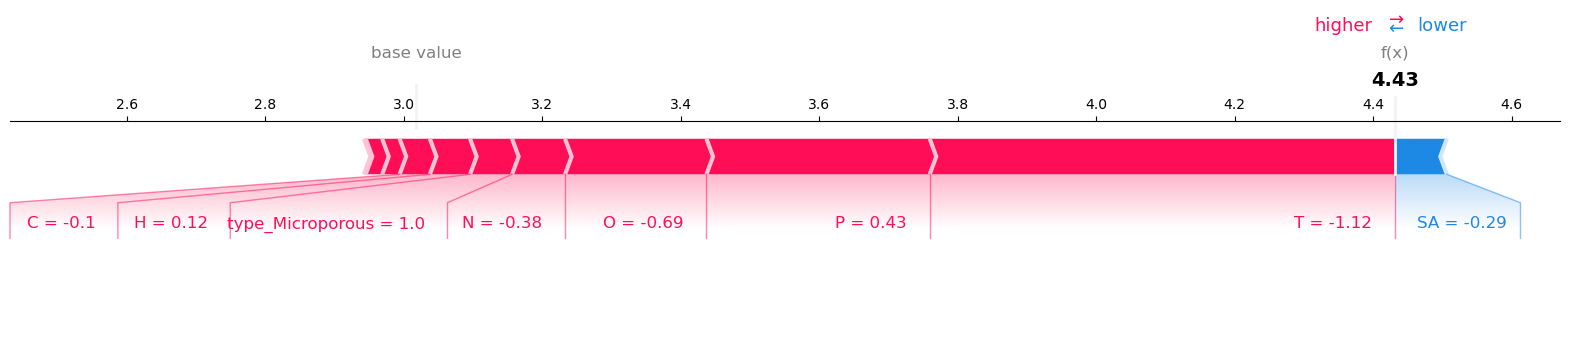

In [31]:
shap.plots.force(shap_values[3,:],matplotlib=True)

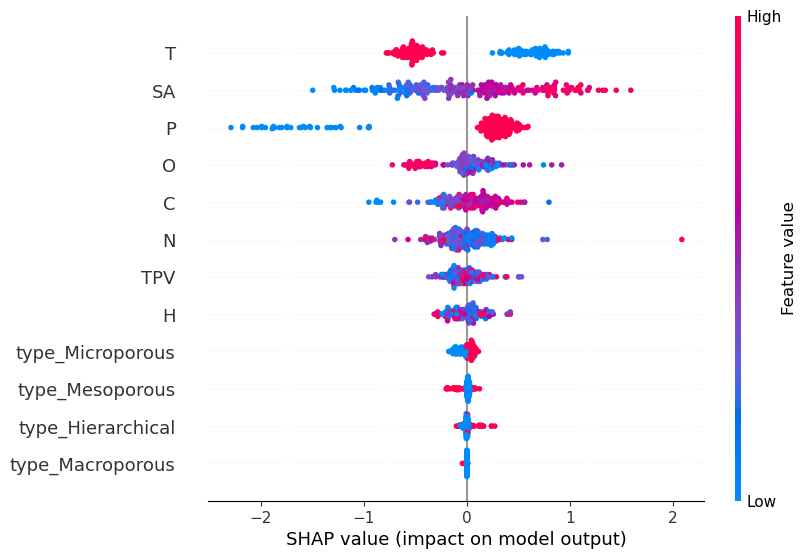

In [16]:
shap.plots.beeswarm(shap_values,max_display=20)

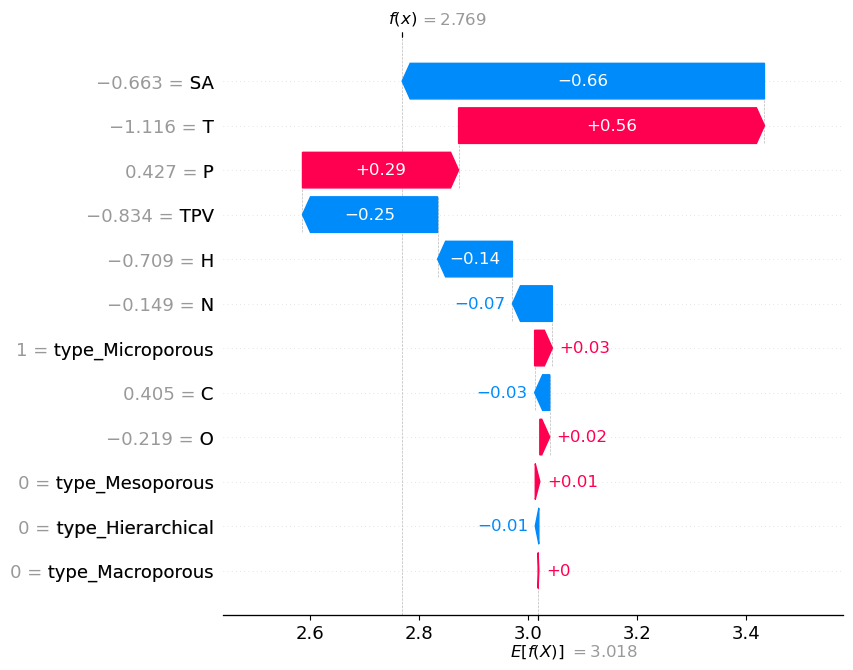

In [17]:
shap.plots.waterfall(shap_values[0],max_display=20)

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.inspection import partial_dependence

def plot_3d_partial_dependence(model, X, feature_pairs, save_path="./"):
    """
    Generate 3D partial dependence plots for specified feature pairs and save each plot as a PNG file.

    Parameters:
    - model: The trained machine learning model
    - X: Feature matrix
    - feature_pairs: List of feature pairs for which partial dependence plots are to be generated
    - save_path: Path to save the PNG files (default is current directory)
    """
    for features in feature_pairs:
        fig = plt.figure(figsize=(10, 8))
        pdp = partial_dependence(model, X, features=features, kind="average", grid_resolution=20)
        XX, YY = np.meshgrid(pdp["grid_values"][0], pdp["grid_values"][1])
        Z = pdp.average[0].T

        ax = fig.add_subplot(111, projection="3d")
        surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu, edgecolor="k")

        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])
        ax.set_zlabel("Partial Dependence")
        ax.set_title(f"Partial Dependence Plot for {features}")

        # Pretty initialization view
        ax.view_init(elev=22, azim=122)

        # Save the plot as PNG
        plt.savefig(f"{save_path}/{features[0]}_vs_{features[1]}.png", dpi=150, bbox_inches="tight")

        plt.close(fig)  # Close the current figure to free up memory

# Example usage
plot_3d_partial_dependence(model, X_train_preprocessed, [['SA', 'TPV'], ['SA', 'N'], ['SA', 'O'], ['SA', 'T'], ['C', 'H'], ['N', 'H']], save_path="./")


In [22]:
type(shap_values)

shap._explanation.Explanation

In [33]:
import matplotlib.pyplot as plt

In [38]:
plt.clf()
shap.plots.force(shap_values[0,:],matplotlib=True,show=False)
plt.savefig("force_plot1.png",dpi=150, bbox_inches='tight')

In [39]:
plt.clf()
shap.plots.force(shap_values[3,:],matplotlib=True,show=False)
plt.savefig("force_plot2.png",dpi=150, bbox_inches='tight')

In [45]:
plt.clf()
shap.plots.beeswarm(shap_values,max_display=20,show=False)
plt.savefig("beeswarm.png",dpi=150, bbox_inches='tight')

In [46]:
plt.clf()
shap.plots.waterfall(shap_values[0],max_display=20,show=False)
plt.savefig("waterfall.png",dpi=150, bbox_inches='tight')